In [11]:
# SUPPORT VECTOR MACHINES

import numpy as np
import matplotlib.pyplot as plt

from matplotlib.colors import ListedColormap

from sklearn import datasets
from sklearn.svm import LinearSVC, SVC
from sklearn.preprocessing import StandardScaler

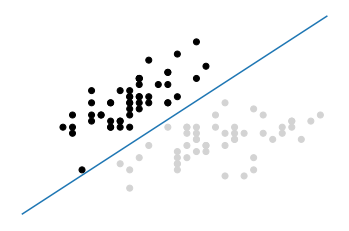

In [6]:
# TRAINING A LINEAR CLASSIFIER

# load datasets with two classes and twi features
iris = datasets.load_iris()
features = iris.data[:100, :2]
target = iris.target[:100]

# standardize features
scaler = StandardScaler()
features_standardized = scaler.fit_transform(features)

# create support vector classofier
svc = LinearSVC(C=1.0)
# train model
model = svc.fit(features_standardized, target)

# plat data points and color using their class
color = ['black' if c == 0 else 'lightgray' for c in target]
plt.scatter(features_standardized[:,0], 
            features_standardized[:, 1], 
           c=color)

# create the hyperplane
w = svc.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(-2.5, 2.5)
yy = a * xx - (svc.intercept_[0]) / w[1]

# plot the hyperplane
plt.plot(xx, yy)
plt.axis('off')
plt.show()

In [8]:
# create new observation
new_observation = [[-2, 3]]
# predict
svc.predict(new_observation)

array([0])

In [10]:
# HANDLING LINEARLY INSEPARABLE CLASSES USING KERNELS

# set randomization seed
np.random.seed(0)
# generate two features
features = np.random.randn(200, 2)

# Use a XOR gate to generate linerly inseparatble classes
target_xor = np.logical_xor(features[:, 0] > 0, features[:, 1] > 0)
target = np.where(target_xor, 0, 1)

# create a support vector machine with a radial basis funtion kernel
svc = SVC(kernel='rbf',
         random_state=0,
         gamma=1,
         C=1)

# train the classifier
model = svc.fit(features, target)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


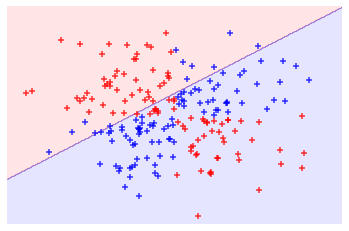

In [13]:
def plot_decision_regions(X, y, classifier):
    cmap = ListedColormap(('red', 'blue'))
    xx1, xx2 = np.meshgrid(np.arange(-3, 3, 0.02), np.arange(-3, 3, 0.02))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.1, cmap=cmap)
    
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y==cl, 0], 
                    y=X[y==cl, 1],
                   alpha=0.8,
                   c=cmap(idx),
                   marker='+',
                   label=cl)
        
    return


# create support vector classifier with a linear kernel
svc_linear = SVC(kernel='linear',
                random_state=0,
                C=1)
# train model
svc_linear.fit(features, target)

# plot observations and hyperplane
plot_decision_regions(features, target, classifier=svc_linear)
plt.axis('off')
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


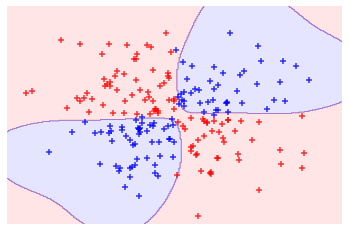

In [14]:
# we see that linear kernel did bad job
# let's try radial basis function
svc = SVC(kernel='rbf',
         random_state=0,
         gamma=1,
         C=1)

# train the classifier
model = svc.fit(features, target)

# plot observations and hyperplane
plot_decision_regions(features, target, classifier=svc)
plt.axis('off')
plt.show()

In [16]:
# CREATED PREDICTED PROBABILITIES

# load data
iris = datasets.load_iris()
features = iris.data
target = iris.target

# standardize features
scaler = StandardScaler()
features_standardized = scaler.fit_transform(features)

# create support vector classifier object
svc = SVC(kernel='linear',
         probability=True,
         random_state=0)

# train classifier
model = svc.fit(features_standardized, target)

# create new observation
new_observation = [[0.4, 0.4, 0.4, 0.4]]
# view predicted probabilities
model.predict_proba(new_observation)

array([[0.00541761, 0.97348825, 0.02109414]])

In [18]:
# IDENTIFYING SUPPORT VECTORS

# load data with only two classes
iris = datasets.load_iris()
features = iris.data[:100, :]
target = iris.target[:100]

# standardize features
scaler = StandardScaler()
features_standardized = scaler.fit_transform(features)

# create support vector classifier object
svc = SVC(kernel='linear',
         random_state=0)

# train classifier
model = svc.fit(features_standardized, target)
# view support vectors
model.support_vectors_

array([[-0.5810659 ,  0.42196824, -0.80497402, -0.50860702],
       [-1.52079513, -1.67737625, -1.08231219, -0.86427627],
       [-0.89430898, -1.4674418 ,  0.30437864,  0.38056609],
       [-0.5810659 , -1.25750735,  0.09637501,  0.55840072]])

In [19]:
# view indices of the support vectors 
model.support_

array([23, 41, 57, 98])

In [20]:
# HANDLING IMBALANCED CLASSES

#Load data with only two classes
iris = datasets.load_iris()
features = iris.data[:100,:]
target = iris.target[:100]

# make class highly imbalanced by rmoving first 40 observations
features = features[40:, :]
target = target[40:]

# create target vector indicating if class 0, otherwise 1
target = np.where((target == 0), 0, 1)

# standardize features
scaler = StandardScaler()
features_standardized = scaler.fit_transform(features)

# create support vector classifier with weighted classes
svc = SVC(kernel='linear',
         class_weight='balanced',
         C=1,
         random_state=0)
# train model
model = svc.fit(features_standardized, target)